# Visualize UMAP for CP features for Plate 3 only

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

install.packages(c("gridExtra", "grid", "ggarrange", "patchwork"))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(grid))


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


Warning message:
“package ‘grid’ is a base package, and should not be updated”
Warning message:
“package ‘ggarrange’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Set directory and file structure
umap_dir <- file.path("results")
plate3_name <- "localhost230405150001"
umap_file <- "UMAP_localhost230405150001_sc_feature_selected.tsv.gz"
umap_path <- file.path(umap_dir, umap_file)


output_fig_dir <- file.path("figures")
umap_prefix <- "UMAP_"

# Define output figure paths

output_umap_file <- file.path(
    output_fig_dir,
    paste0(umap_prefix, plate3_name)
)

print(output_umap_file)


[1] "figures/UMAP_localhost230405150001"


In [3]:
# Load in the umap data
df <- readr::read_tsv(
    umap_path,
    col_types = readr::cols(
        .default = "d",
        "Metadata_WellRow" = "c",
        "Metadata_WellCol" = "c",
        "Metadata_heart_number" = "c",
        "Metadata_treatment" = "c",
        "Metadata_ImageNumber" = "c",
        "Metadata_cell_type" = "c",
        "Metadata_heart_failure_type" = "c",
        "Metadata_Plate" = "c",
        "Metadata_Well" = "c",
        "Metadata_Site" = "c",
        "Metadata_Cytoplasm_Parent_Cells" = "c",
        "Metadata_Cytoplasm_Parent_Nuclei" = "c",
        "Metadata_Cells_Number_Object_Number" = "c",
        "Metadata_Nuclei_Number_Object_Number" = "c"
    )
)
cell_count_df <- df %>%
    dplyr::group_by(Metadata_Well) %>%
    dplyr::count()

umap_cp_df <- df %>%
    dplyr::left_join(cell_count_df, by = "Metadata_Well")


## Generate UMAPs

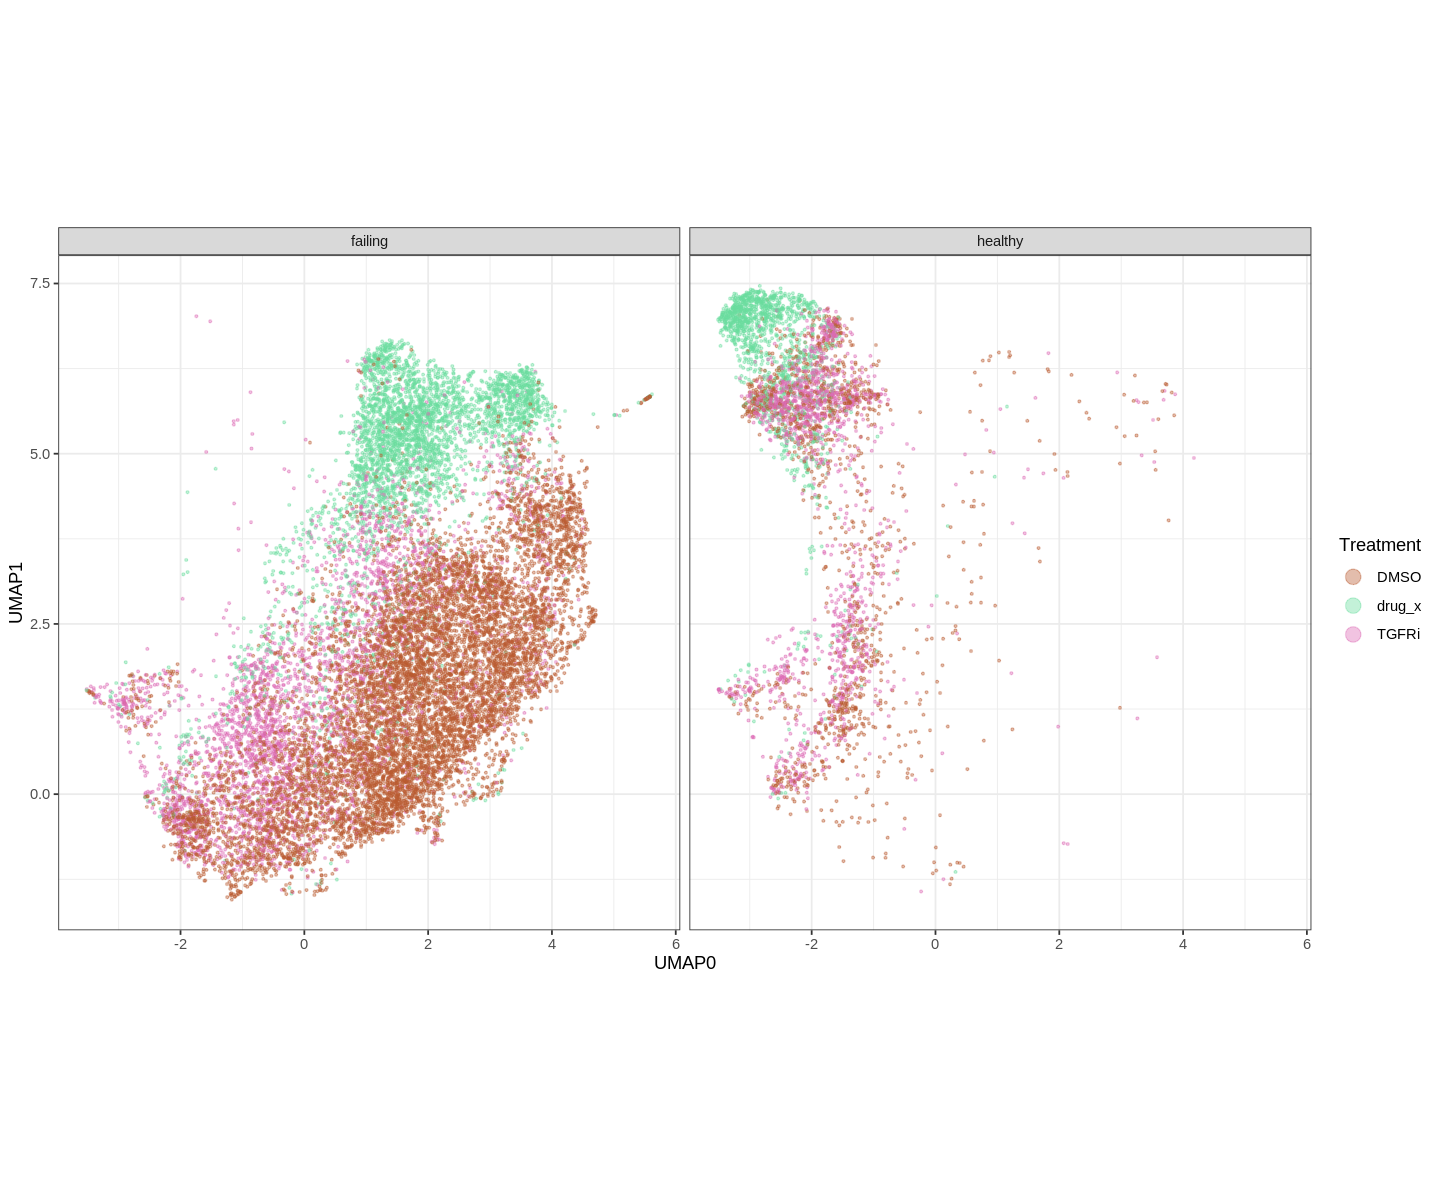

In [4]:
# Generating UMAPs 
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment.png")

treatment_gg <- ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.5, alpha = 0.4) +  # Adjusted alpha value
  theme_bw() +
  scale_color_manual(name = "Treatment",
                     values = c("DMSO" = "#BA5A31", "drug_x" = "#69DC9E", "TGFRi" = "#DC69B4")) +
  facet_wrap(~ Metadata_cell_type) +
  guides(colour = guide_legend(override.aes = list(size = 4))) + 
  coord_fixed(1.1)

ggsave(output_file, treatment_gg, dpi = 500, height = 7, width = 10)

print(treatment_gg)


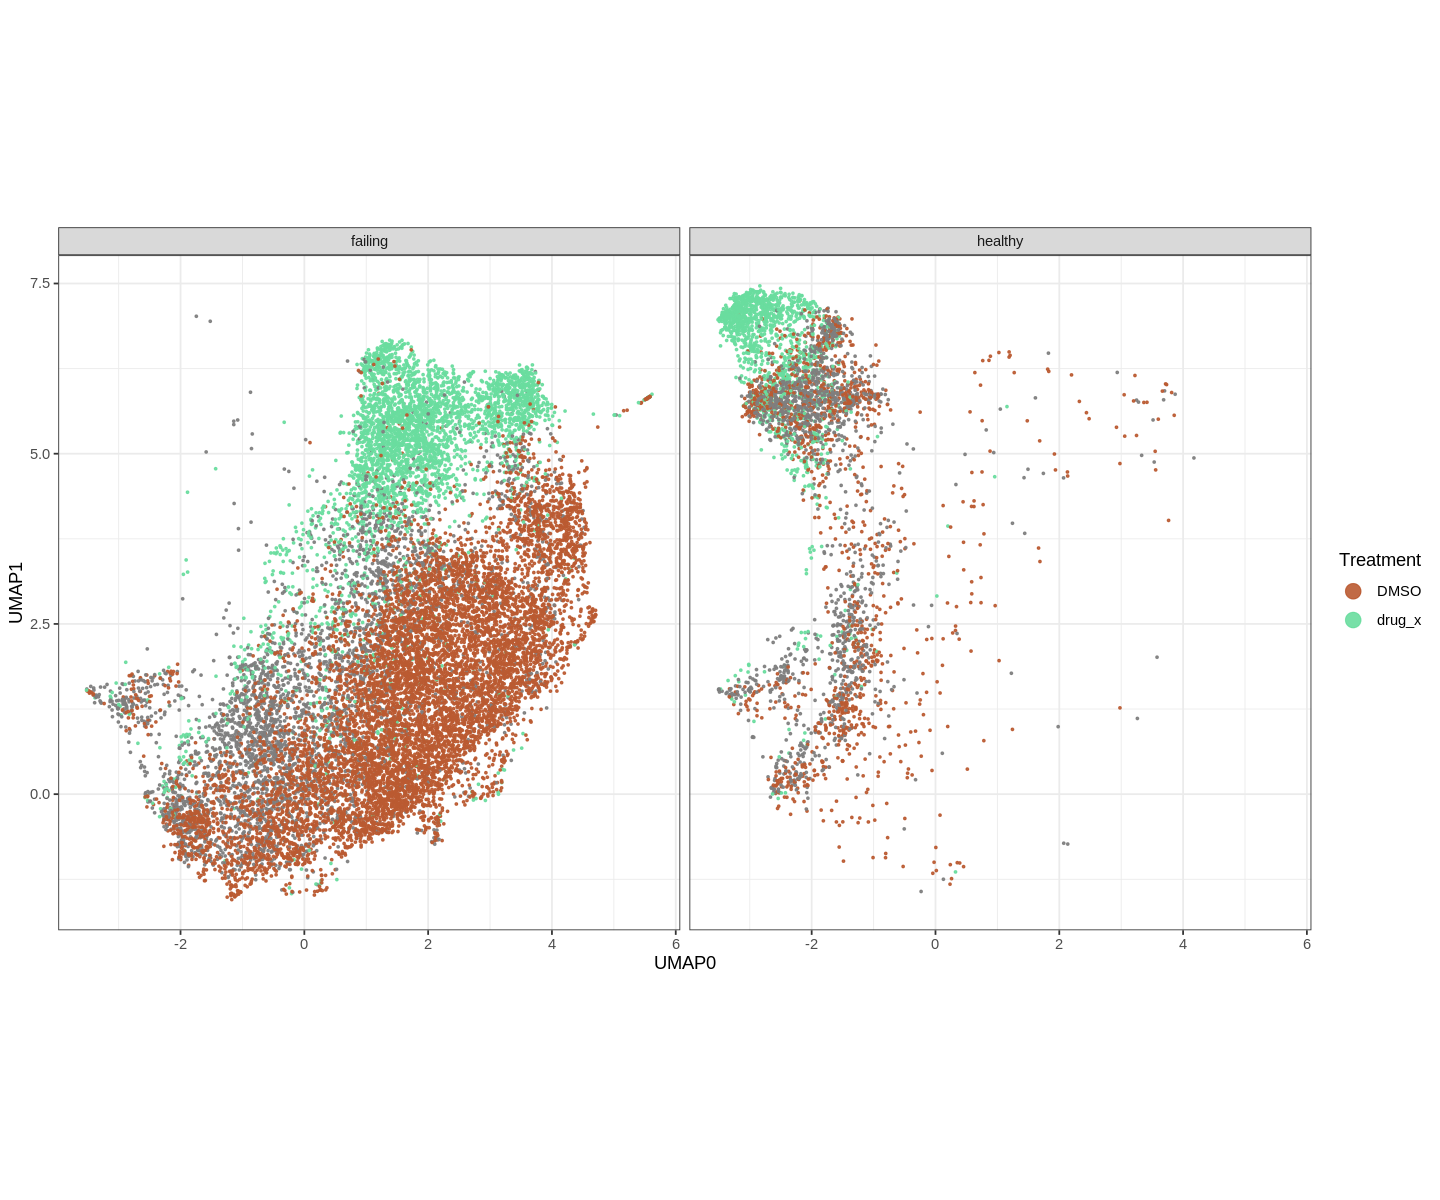

In [5]:
# Generating UMAP comparing failing and healthy with DMSO and Drug_X
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment_dmso_drugx.png")

treatment_gg <- ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.4, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31", "drug_x" = "#69DC9E")
  ) +
  facet_grid(~ Metadata_cell_type) +
  guides(colour = guide_legend(override.aes = list(size = 4))) + 
  coord_fixed(1.1)


ggsave(output_file, treatment_gg, dpi = 500, height = 7, width = 10)


print(treatment_gg)


In [15]:
# Filter the data frames
failing_drug_x_df <- umap_cp_df %>% filter(Metadata_cell_type == "failing" & Metadata_treatment == "drug_x")
failing_DMSO_df <- umap_cp_df %>% filter(Metadata_cell_type == "failing" & Metadata_treatment == "DMSO")
healthy_DMSO_df <- umap_cp_df %>% filter(Metadata_cell_type == "healthy" & Metadata_treatment == "DMSO")
failing_TGFRi_df <- umap_cp_df %>% filter(Metadata_cell_type == "failing" & Metadata_treatment == "TGFRi")


In [16]:
print(paste0("failing", " + ", "drug_x"))
print(paste0("failing", "+", "DMSO"))
print(paste0("healthy", " + ", "DMSO"))
print(paste0("failing", " + ", "TGFRi"))


[1] "failing + drug_x"
[1] "failing+DMSO"
[1] "healthy + DMSO"
[1] "failing + TGFRi"


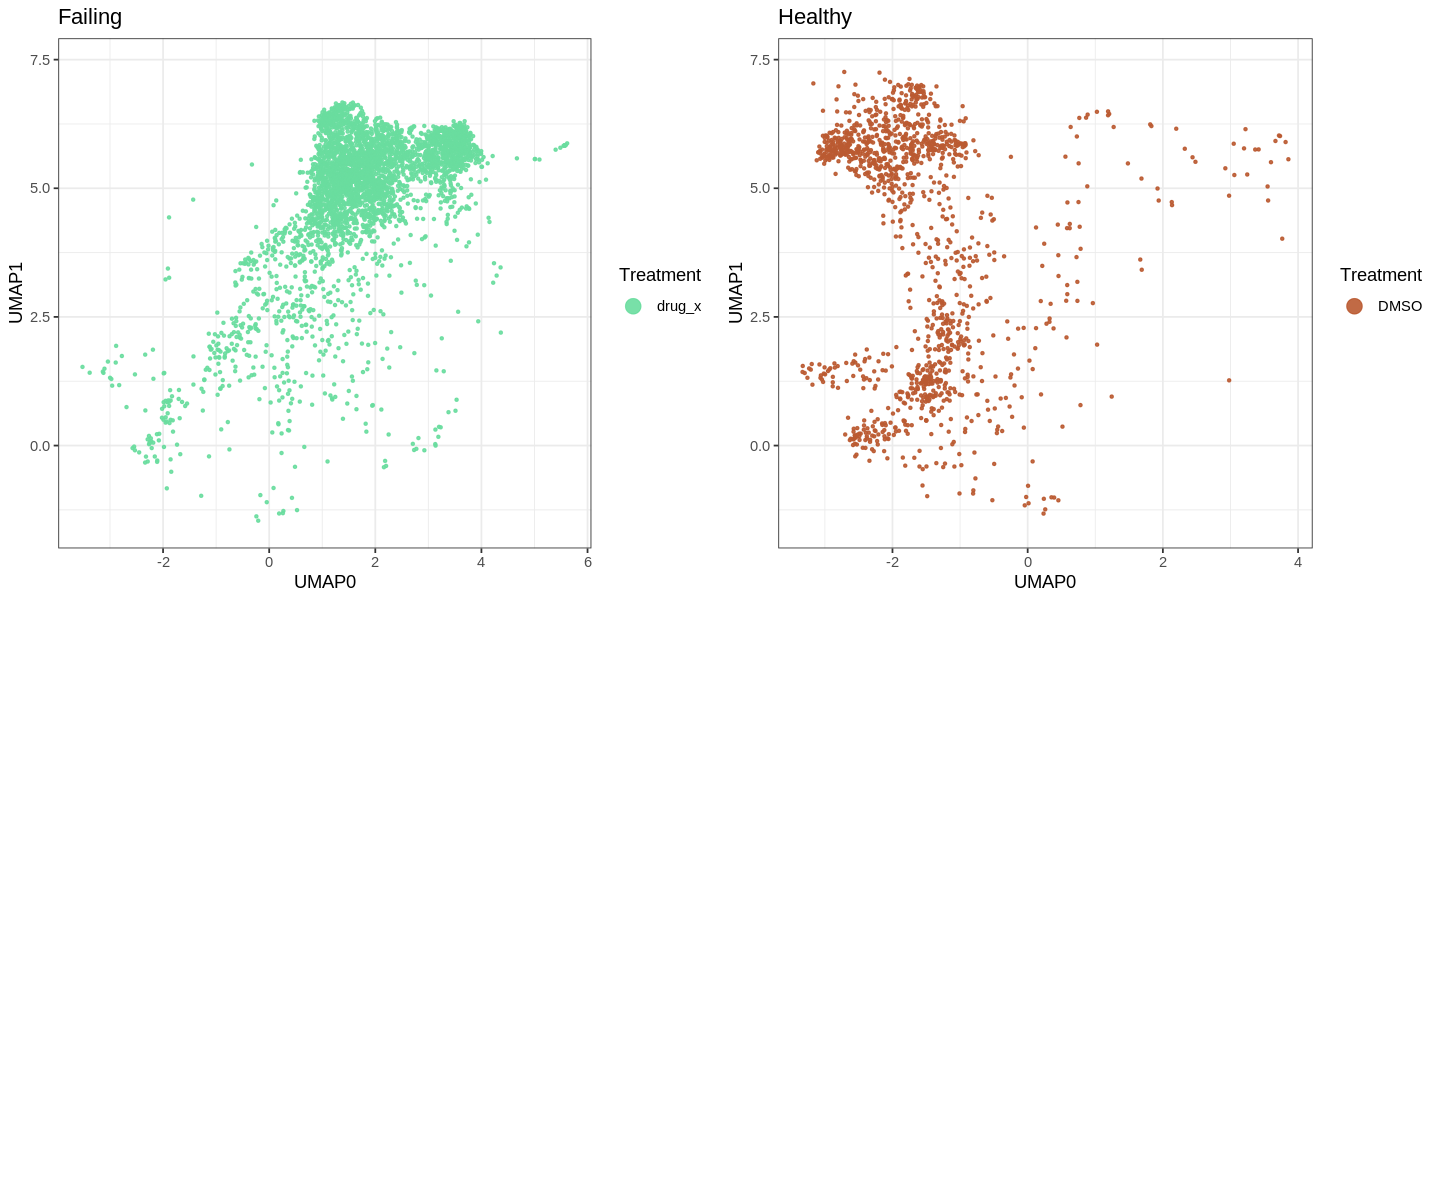

In [8]:
# UMAP Plot healthy w/ DMSO and failing w/ treatment
# plot 1 -> failing w/ Drug_X
# plot 2 -> healthy w/ DMSO
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment_health_vs_failing.png")

# plot 
plot1 <- ggplot(failing_drug_x_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.6, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("drug_x" = "#69DC9E")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  labs(title = "Failing") +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1))  # Set the same y-axis limits as umap_cp_df

plot2 <- ggplot(healthy_DMSO_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.6, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  labs(title = "Healthy") +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1))  # Set the same y-axis limits as umap_cp_df

# merging both plots into one figure
merged_plot <- grid.arrange(
  plot1, plot2, ncol = 2,
  widths = c(1, 1), heights = c(1, 1)
)

# saving image
ggsave(output_file, merged_plot, dpi = 500, height = 12, width = 10)


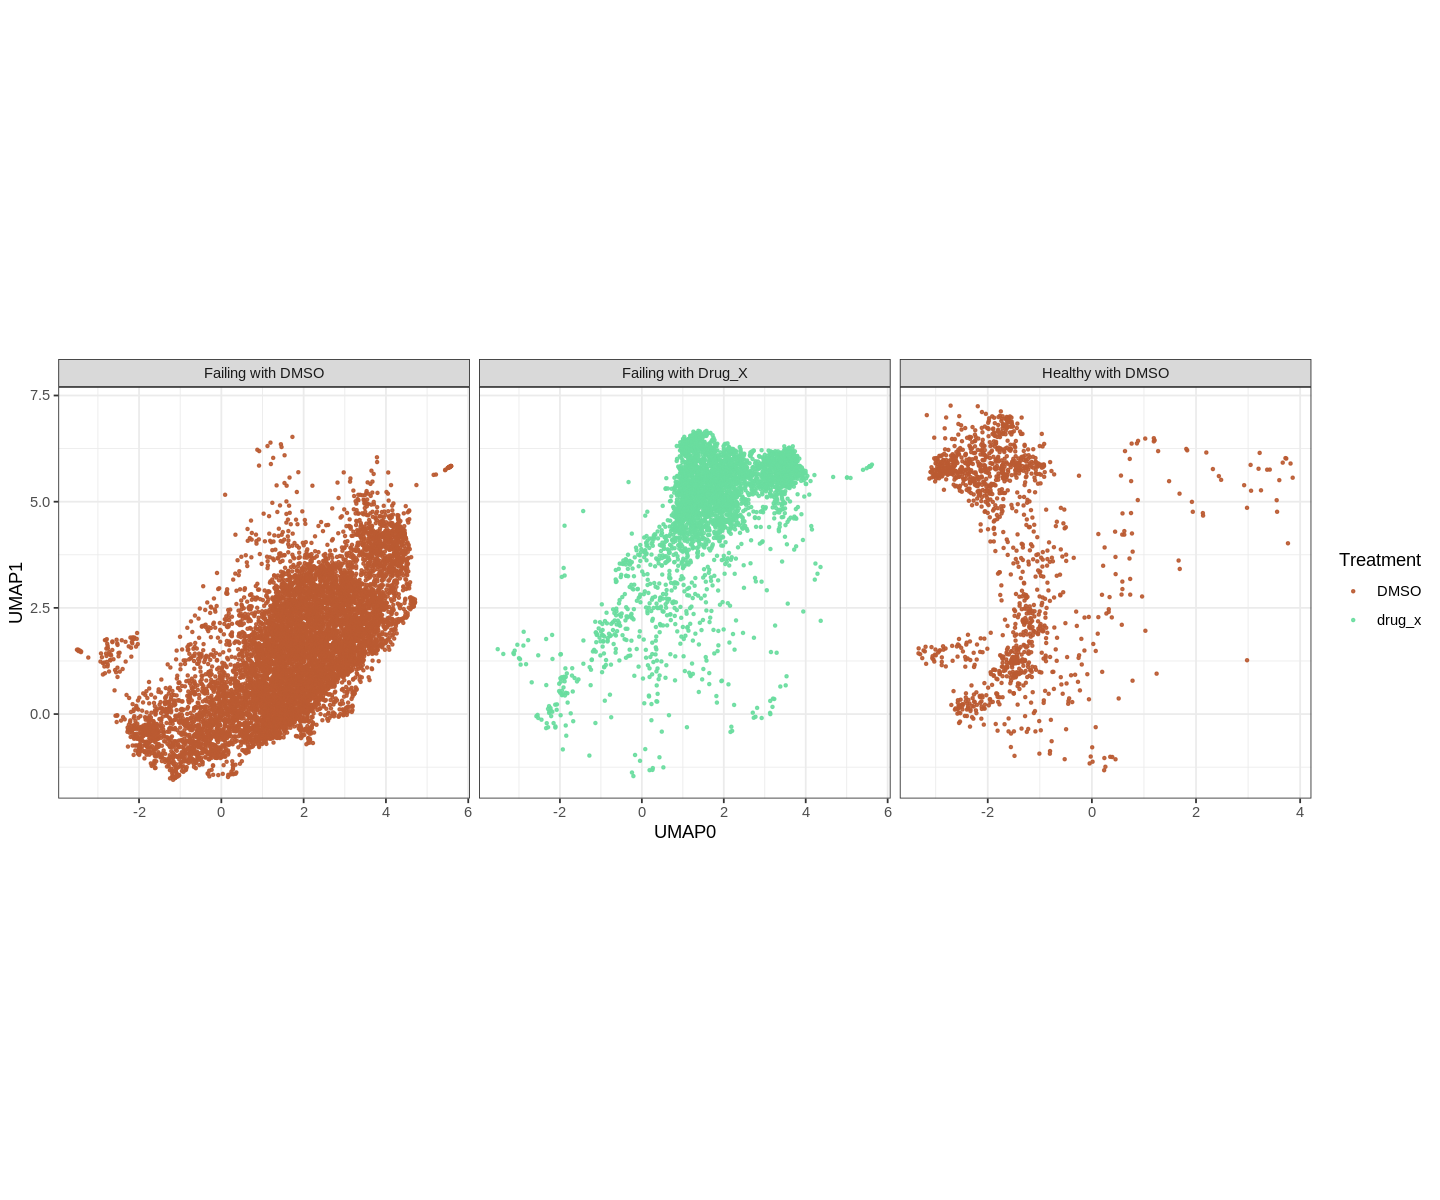

In [10]:
# Set the size of each plot
# UMAP Plot healthy w/ DMSO and failing w/ treatment
output_file <- paste0(output_umap_file, "_failing_DMSO_and_DrugX_w_healthy_DMSO.png")

# combine all dfs
combined_df <- rbind(
  failing_drug_x_df %>% mutate(Group = "Failing with Drug_X"),
  healthy_DMSO_df %>% mutate(Group = "Healthy with DMSO"),
  failing_DMSO_df %>% mutate(Group = "Failing with DMSO")
)

# Plot the combined data with facets
merged_plot <- ggplot(combined_df, aes(x = UMAP0, y = UMAP1, color = Metadata_treatment)) +
  geom_point(size = 0.6, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("drug_x" = "#69DC9E", "DMSO" = "#BA5A31")
  ) +
  facet_grid(~ Group, scales = "free") + 
  theme(aspect.ratio = 1)


# Saving image
ggsave(output_file, merged_plot, dpi = 500, height = 5, width = 12)

print(merged_plot)


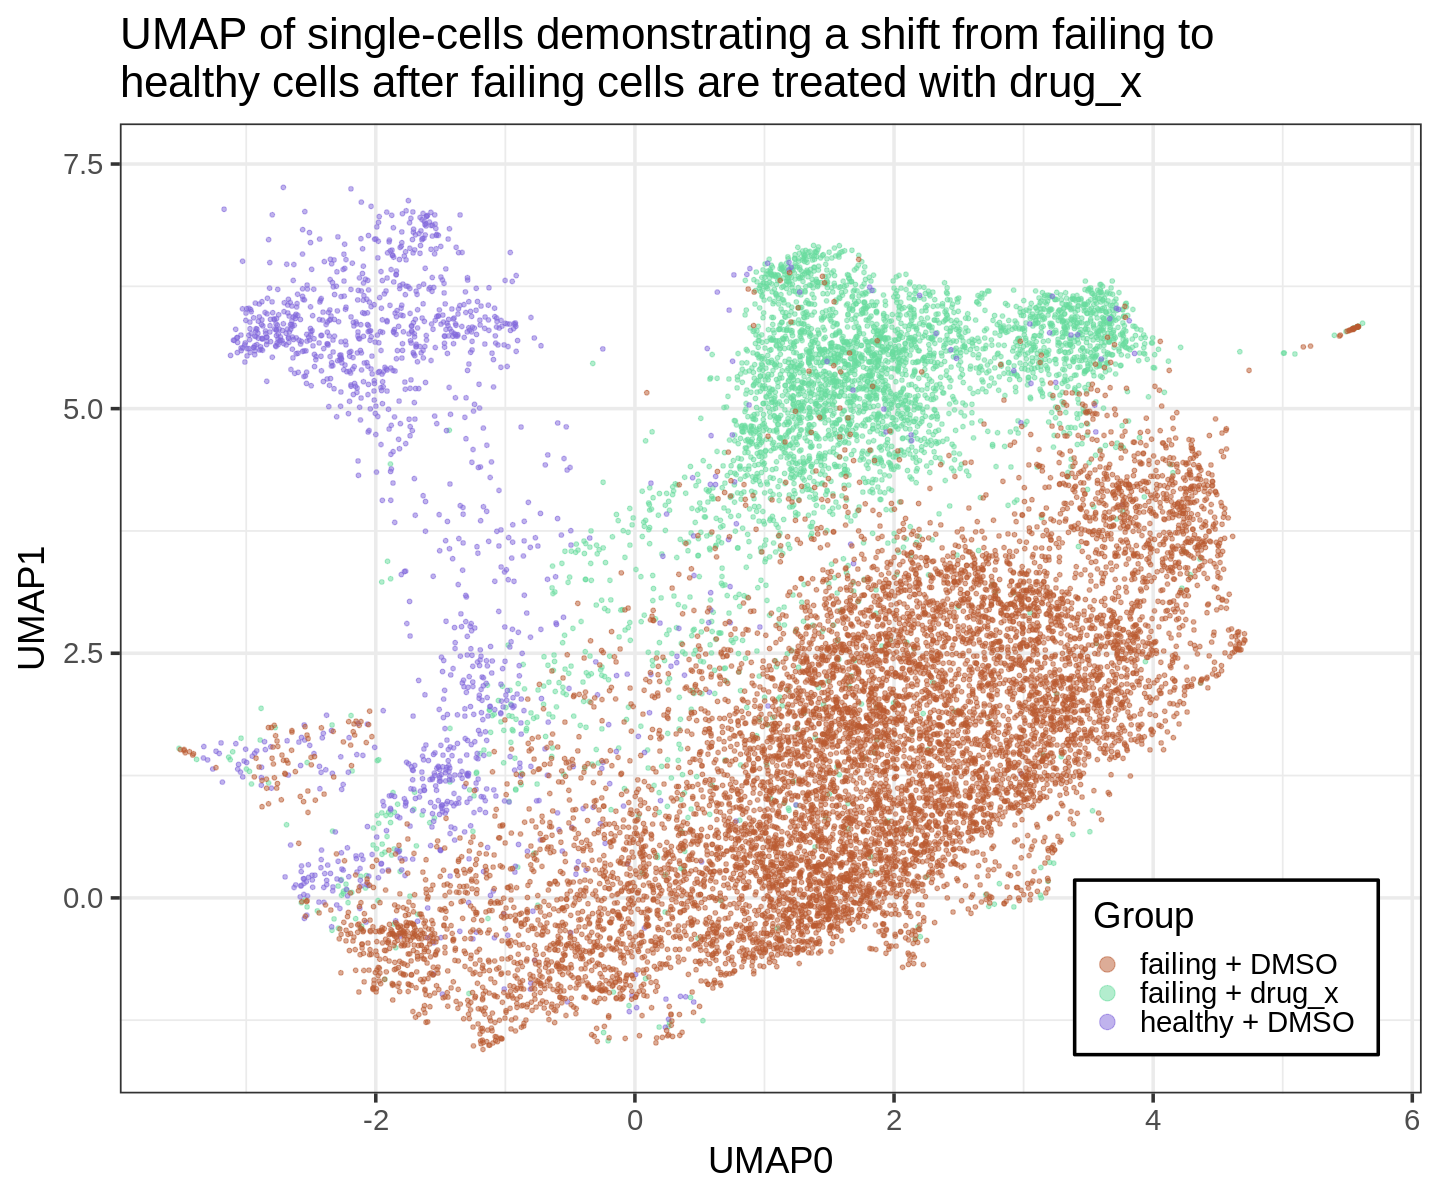

In [14]:
# UMAP merged plots (from above)
output_file <- paste0(output_umap_file, "_failing_DMSO_and_DrugX_w_healhy_DMSO_Merged.png")

# Create a combined data frame with the "Group" column
combined_df <- rbind(
  failing_drug_x_df %>% mutate(Group = "failing + drug_x"),
  healthy_DMSO_df %>% mutate(Group = "healthy + DMSO"),
  failing_DMSO_df %>% mutate(Group = "failing + DMSO")
)

# Plot the combined data without facets
merged_plot <- ggplot(combined_df, aes(x = UMAP0, y = UMAP1, color = Group)) +
  geom_point(size = 1.0 , alpha = 0.5) +  # Adjust alpha value to make points more transparent
  labs(title = "UMAP of single-cells demonstrating a shift from failing to\nhealthy cells after failing cells are treated with drug_x") + 
  theme_bw(base_size = 22) +  # Set the base font size to 12
  scale_color_manual(
    name = "Group",
    values = c("failing + drug_x" = "#69DC9E", "failing + DMSO" = "#BA5A31", "healthy + DMSO" = "#8269dc")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1)) +  # Set the same y-axis limits as umap_cp_df
  theme(
    legend.position = c(0.85, 0.13),  # Adjust the legend position (x, y)
    legend.background = element_rect(fill = "white", color = "black"),  # Add a white background to the legend
    legend.key = element_rect(color = "white"),  # Make legend key (color boxes) white

  )
# print and save plot
print(merged_plot)
ggsave(output_file, merged_plot, dpi = 500, height = 12, width = 12)


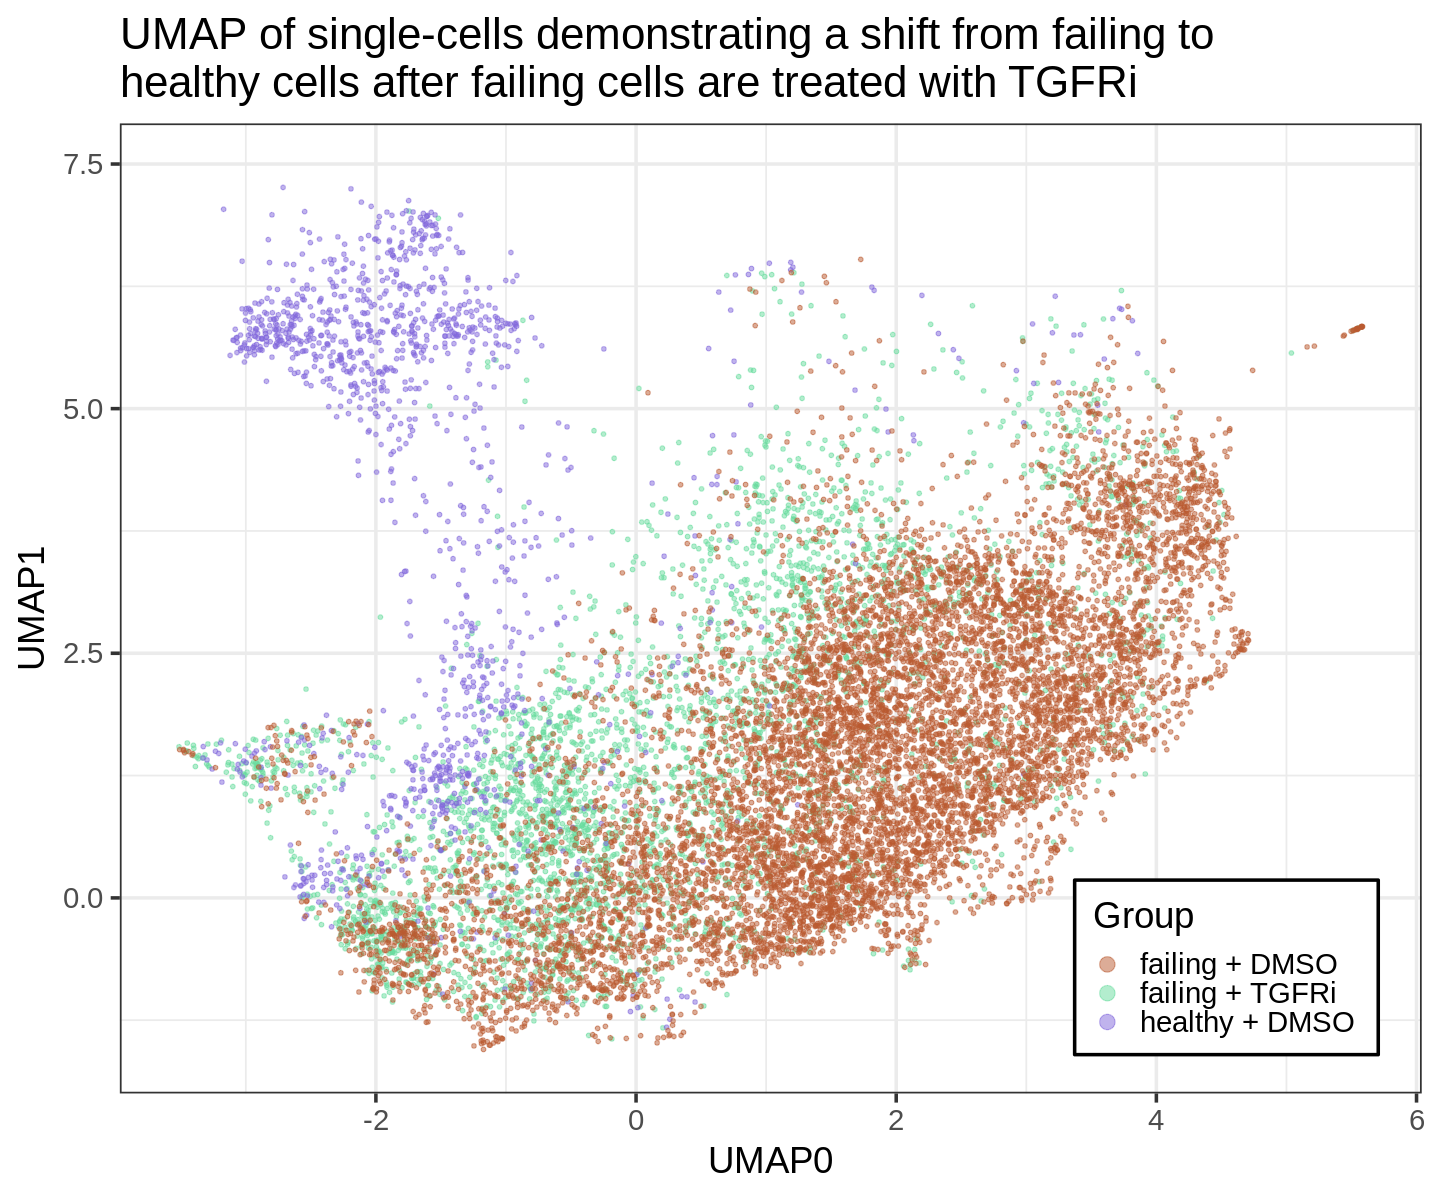

In [18]:
# combine all dfs with TGFRi
combined_df <- rbind(
  failing_TGFRi_df %>% mutate(Group = "Failing with TGFRi"),
  healthy_DMSO_df %>% mutate(Group = "Healthy with DMSO"),
  failing_DMSO_df %>% mutate(Group = "Failing with DMSO")
)

# UMAP merged plots (from above)
output_file <- paste0(output_umap_file, "_failing_DMSO_and_TGFRi_w_healthy_DMSO_Merged.png")

# Create a combined data frame with the "Group" column
combined_df <- rbind(
  failing_TGFRi_df %>% mutate(Group = "failing + TGFRi"),
  healthy_DMSO_df %>% mutate(Group = "healthy + DMSO"),
  failing_DMSO_df %>% mutate(Group = "failing + DMSO")
)

# Plot the combined data without facets
merged_TGFRi_plot <- ggplot(combined_df, aes(x = UMAP0, y = UMAP1, color = Group)) +
  geom_point(size = 1.0 , alpha = 0.5) +  # Adjust alpha value to make points more transparent
  labs(title = "UMAP of single-cells demonstrating a shift from failing to\nhealthy cells after failing cells are treated with TGFRi") + 
  theme_bw(base_size = 22) +  # Set the base font size to 12
  scale_color_manual(
    name = "Group",
    values = c("failing + TGFRi" = "#69DC9E", "failing + DMSO" = "#BA5A31", "healthy + DMSO" = "#8269dc")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1)) +  # Set the same y-axis limits as umap_cp_df
  theme(
    legend.position = c(0.85, 0.13),  # Adjust the legend position (x, y)
    legend.background = element_rect(fill = "white", color = "black"),  # Add a white background to the legend
    legend.key = element_rect(color = "white"),  # Make legend key (color boxes) white

  )
# print and save plot
print(merged_TGFRi_plot)
ggsave(output_file, merged_TGFRi_plot, dpi = 500, height = 12, width = 12)


In [ ]:
# UMAP merged plots (from above)
output_file <- paste0(output_umap_file, "_failing_DMSO_and_DrugX_w_healhy_DMSO_Merged.png")

# Create a combined data frame with the "Group" column
combined_df <- rbind(
  failing_drug_x_df %>% mutate(Group = "failing + drug_x"),
  healthy_DMSO_df %>% mutate(Group = "healthy + DMSO"),
  failing_DMSO_df %>% mutate(Group = "failing + DMSO")
)

# Plot the combined data without facets
merged_plot <- ggplot(combined_df, aes(x = UMAP0, y = UMAP1, color = Group)) +
  geom_point(size = 1.0 , alpha = 0.5) +  # Adjust alpha value to make points more transparent
  labs(title = "UMAP of single-cells demonstrating a shift from failing to\nhealthy cells after failing cells are treated with drug_x") + 
  theme_bw(base_size = 22) +  # Set the base font size to 12
  scale_color_manual(
    name = "Group",
    values = c("failing + drug_x" = "#69DC9E", "failing + DMSO" = "#BA5A31", "healthy + DMSO" = "#8269dc")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1)) +  # Set the same y-axis limits as umap_cp_df
  theme(
    legend.position = c(0.85, 0.13),  # Adjust the legend position (x, y)
    legend.background = element_rect(fill = "white", color = "black"),  # Add a white background to the legend
    legend.key = element_rect(color = "white"),  # Make legend key (color boxes) white

  )
# print and save plot
print(merged_plot)
ggsave(output_file, merged_plot, dpi = 500, height = 12, width = 12)


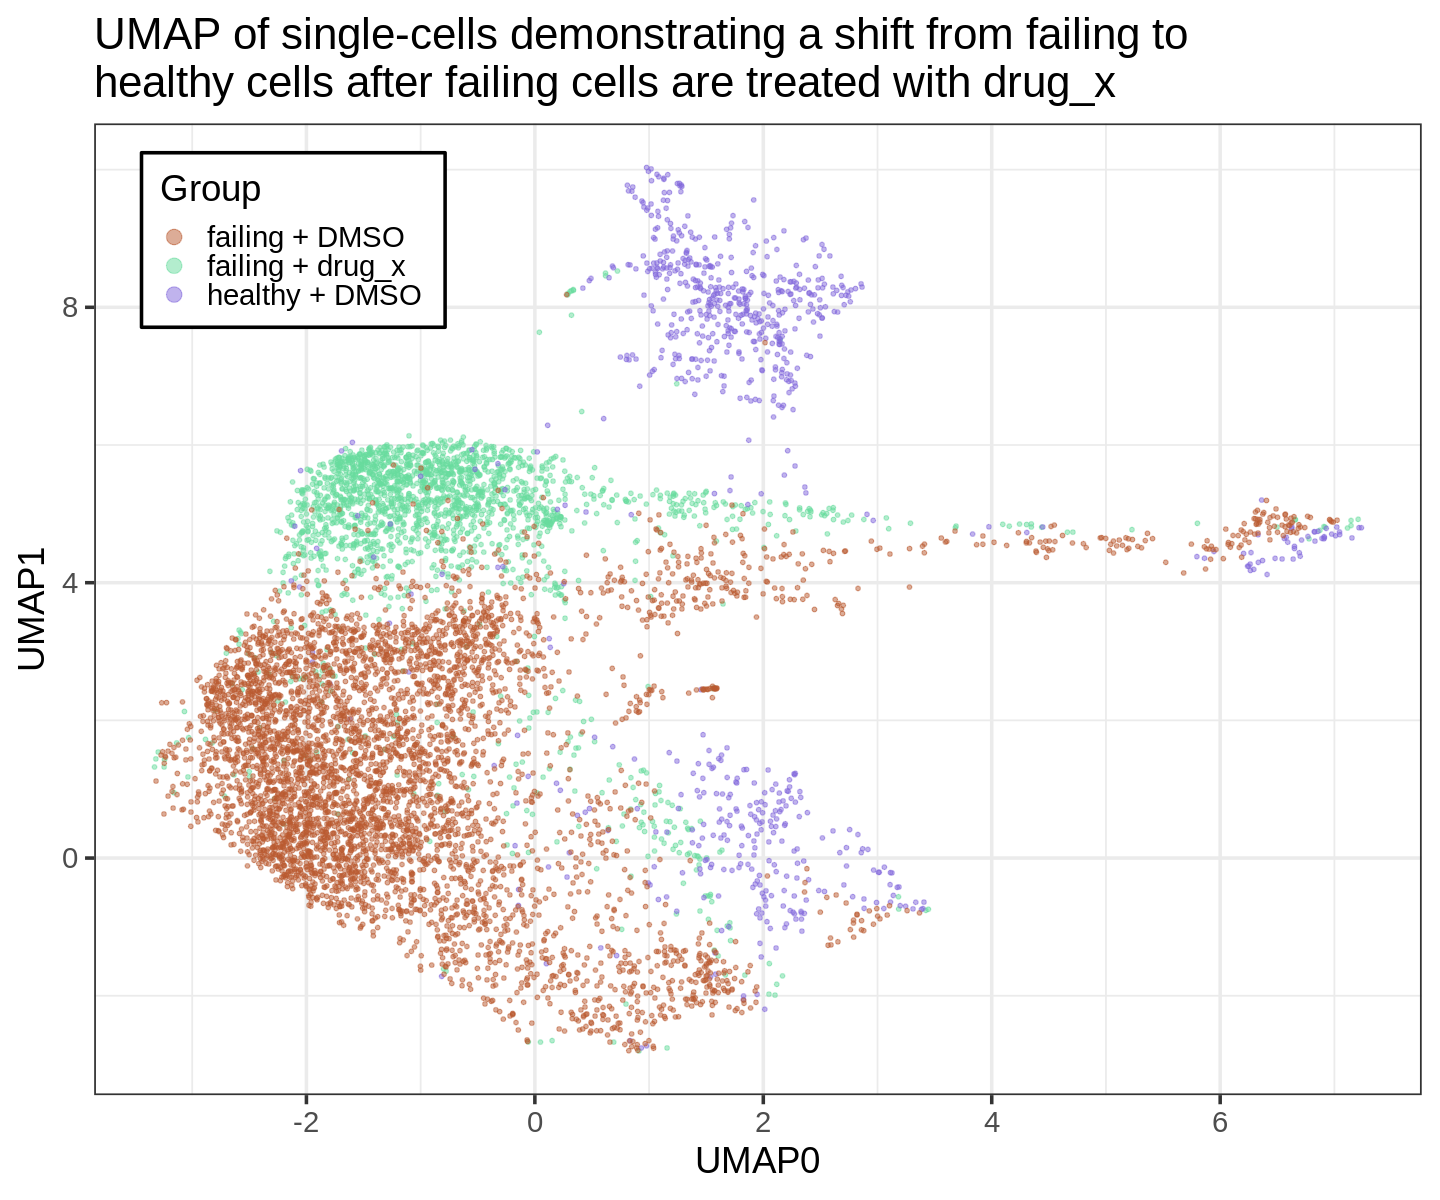

In [11]:
# UMAP merged plots (from above)
output_file <- paste0(output_umap_file, "_failing_DMSO_and_DrugX_w_healthy_DMSO_Merged_remove_edge.png")

# Define the edge buffer size
edge_buffer <- 250

# Create a combined data frame with the "Group" column
combined_df <- rbind(
failing_drug_x_df %>% mutate(Group = "failing + drug_x"),
healthy_DMSO_df %>% mutate(Group = "healthy + DMSO"),
failing_DMSO_df %>% mutate(Group = "failing + DMSO")
)

# Filter rows that are not close to the image edges
combined_df <- combined_df %>%
filter(
Metadata_Cells_Location_Center_X > edge_buffer,
Metadata_Cells_Location_Center_X < (1104 - edge_buffer),  
Metadata_Cells_Location_Center_Y > edge_buffer,
Metadata_Cells_Location_Center_Y < (1105 - edge_buffer) 
)

# Plot the combined data without facets
merged_plot <- ggplot(combined_df, aes(x = UMAP0, y = UMAP1, color = Group)) +
geom_point(size = 1.0, alpha = 0.5) +
labs(title = "UMAP of single-cells demonstrating a shift from failing to\nhealthy cells after failing cells are treated with drug_x") + 
theme_bw(base_size = 22) +
scale_color_manual(
name = "Group",
values = c("failing + drug_x" = "#69DC9E", "failing + DMSO" = "#BA5A31", "healthy + DMSO" = "#8269dc")
) +
guides(colour = guide_legend(override.aes = list(size = 4))) +
ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1)) +
theme(
legend.position = c(0.15, 0.88),
legend.background = element_rect(fill = "white", color = "black"),
legend.key = element_rect(color = "white")
)
# print and save plot
print(merged_plot)
ggsave(output_file, merged_plot, dpi = 500, height = 12, width = 12)


In [12]:
# Only extracting DMSO only entries
dmso_df <- subset(umap_cp_df, Metadata_treatment == "DMSO")
dmso_failing_df <- subset(dmso_df, Metadata_cell_type == "failing")
dmso_healthy_df <- subset(dmso_df, Metadata_cell_type == "healthy")


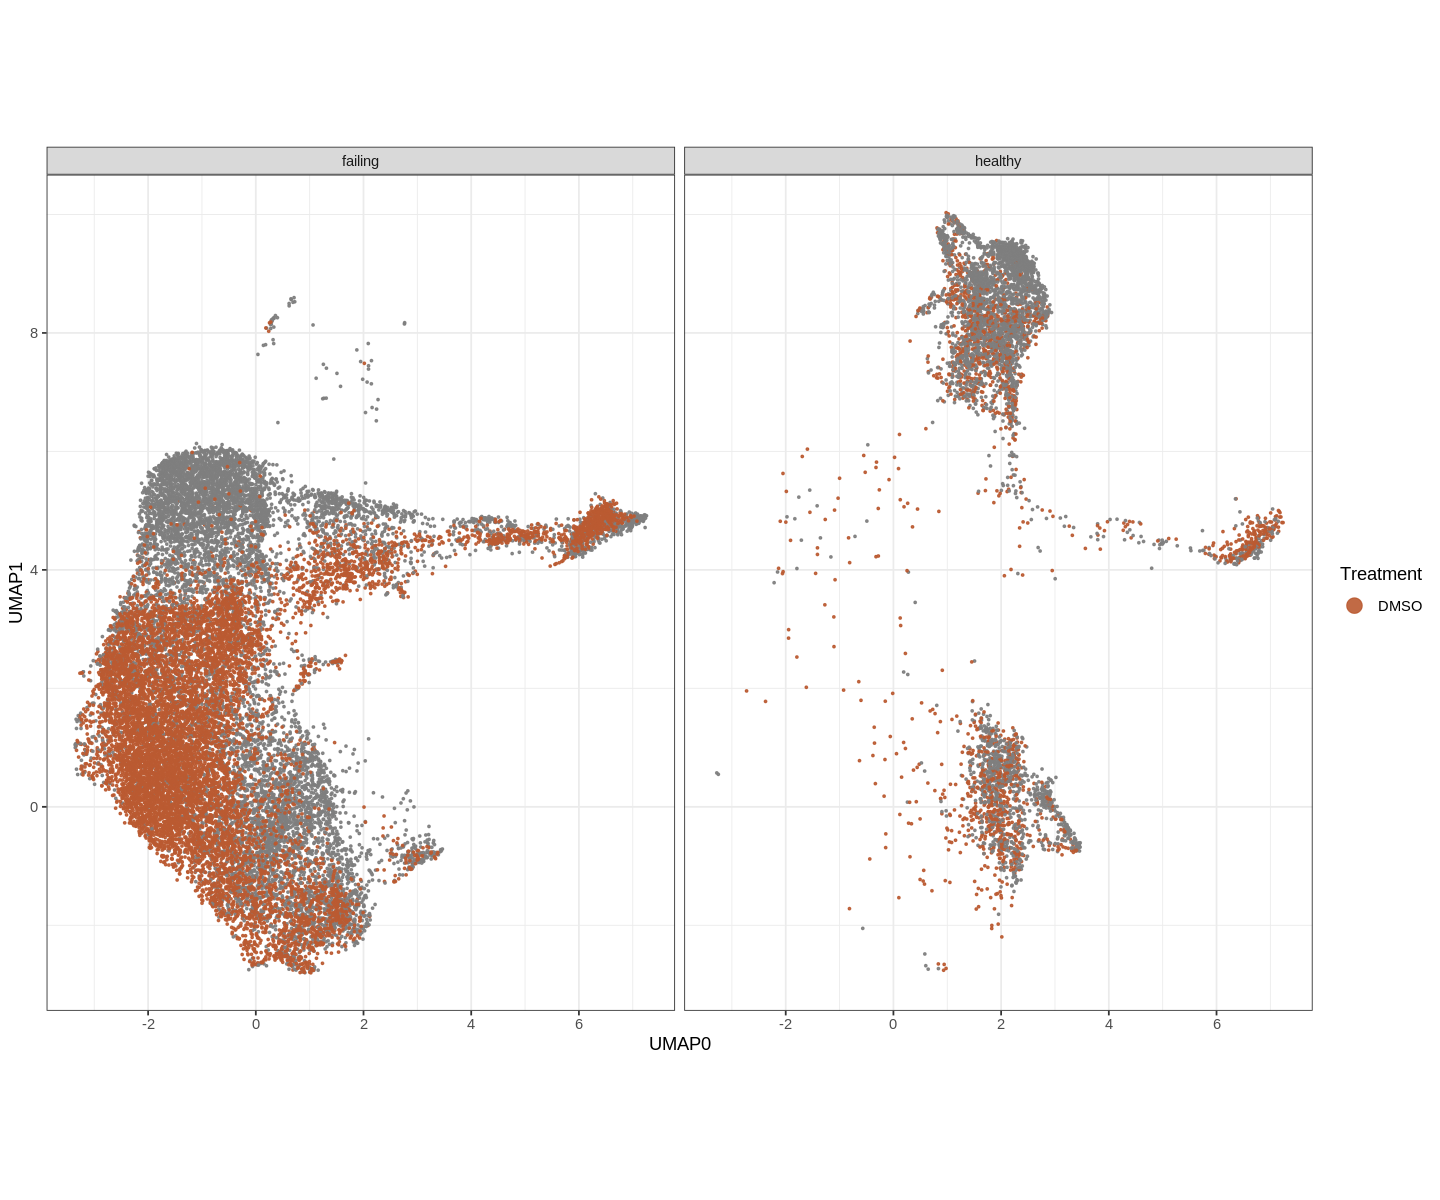

In [13]:
# plotting UMAP failing and non-failing DMSO only 
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment_F_H_dmso_.png")

treatment_gg <- ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.4, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31")
  ) +
  facet_grid(~ Metadata_cell_type) +
  guides(colour = guide_legend(override.aes = list(size = 4))) + 
  coord_fixed(1.1)


ggsave(output_file, treatment_gg, dpi = 500, height = 7, width = 10)


print(treatment_gg)


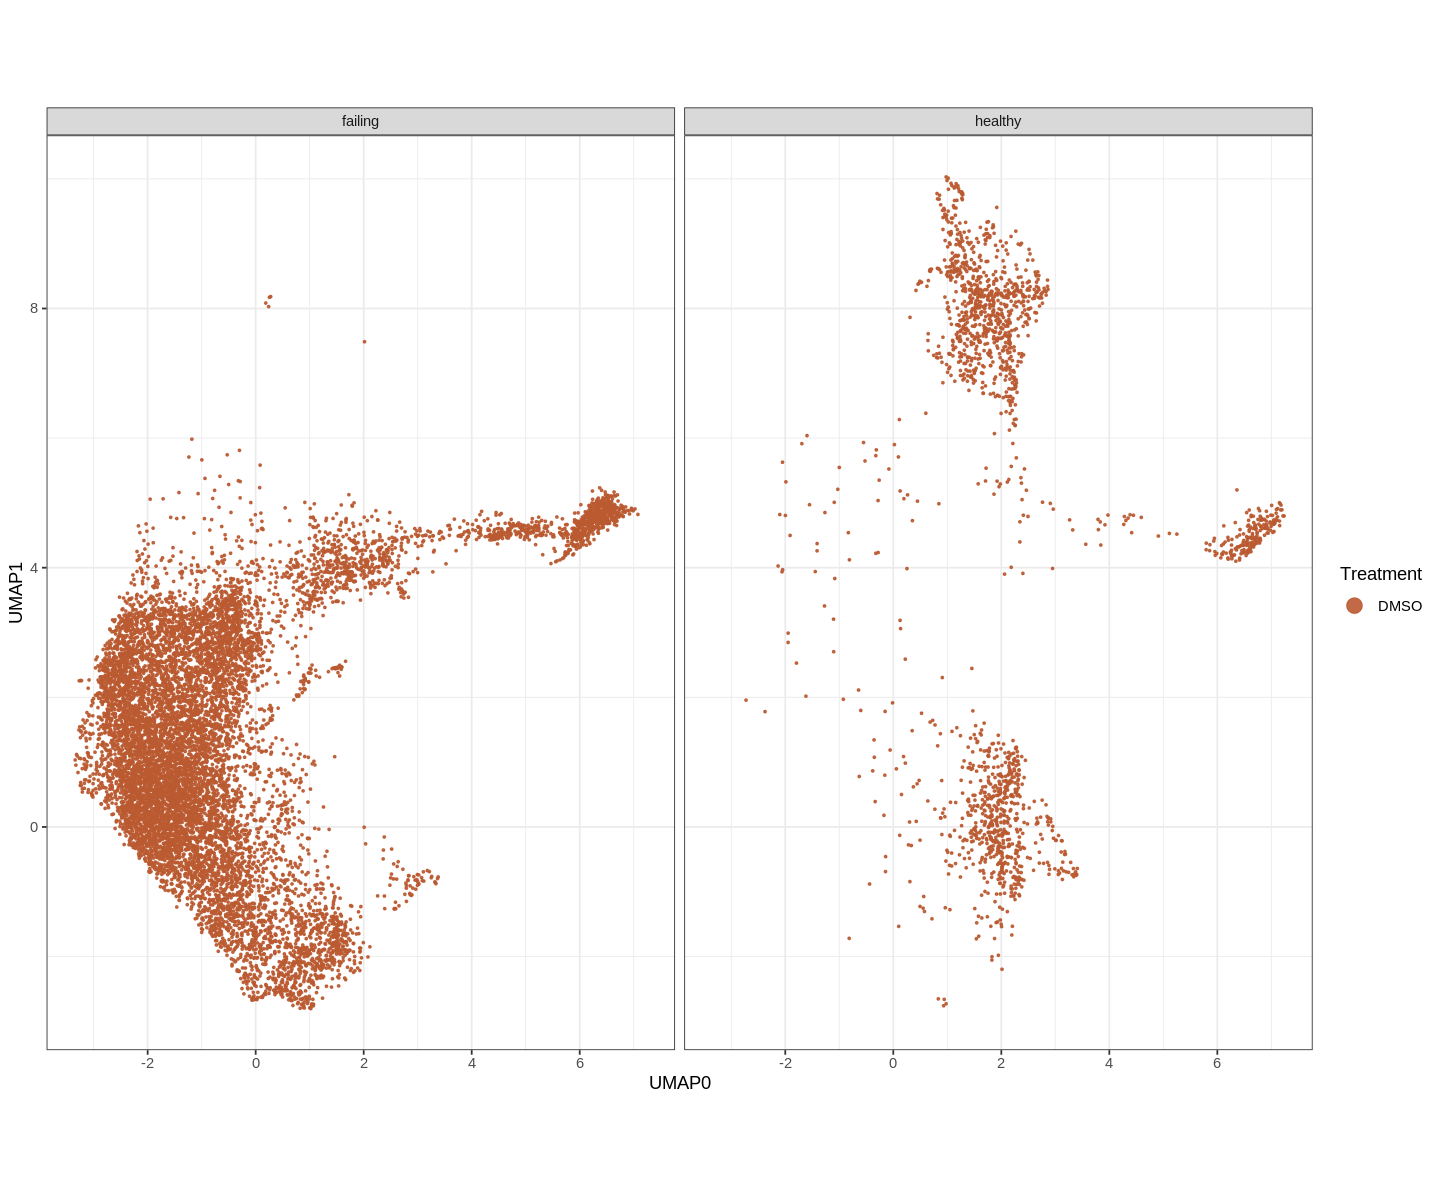

In [14]:
# plotting UMAP failing and non-failing DMSO only 
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust width and height as desired
output_file <- paste0(output_umap_file, "_treatment_F_H_dmso_cleaned.png")

treatment_gg <- ggplot(dmso_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.4, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31")
  ) +
  facet_grid(~ Metadata_cell_type) +
  guides(colour = guide_legend(override.aes = list(size = 4))) + 
  coord_fixed(1.2)

ggsave(output_file, treatment_gg, dpi = 500, height = 7, width = 10)

print(treatment_gg)


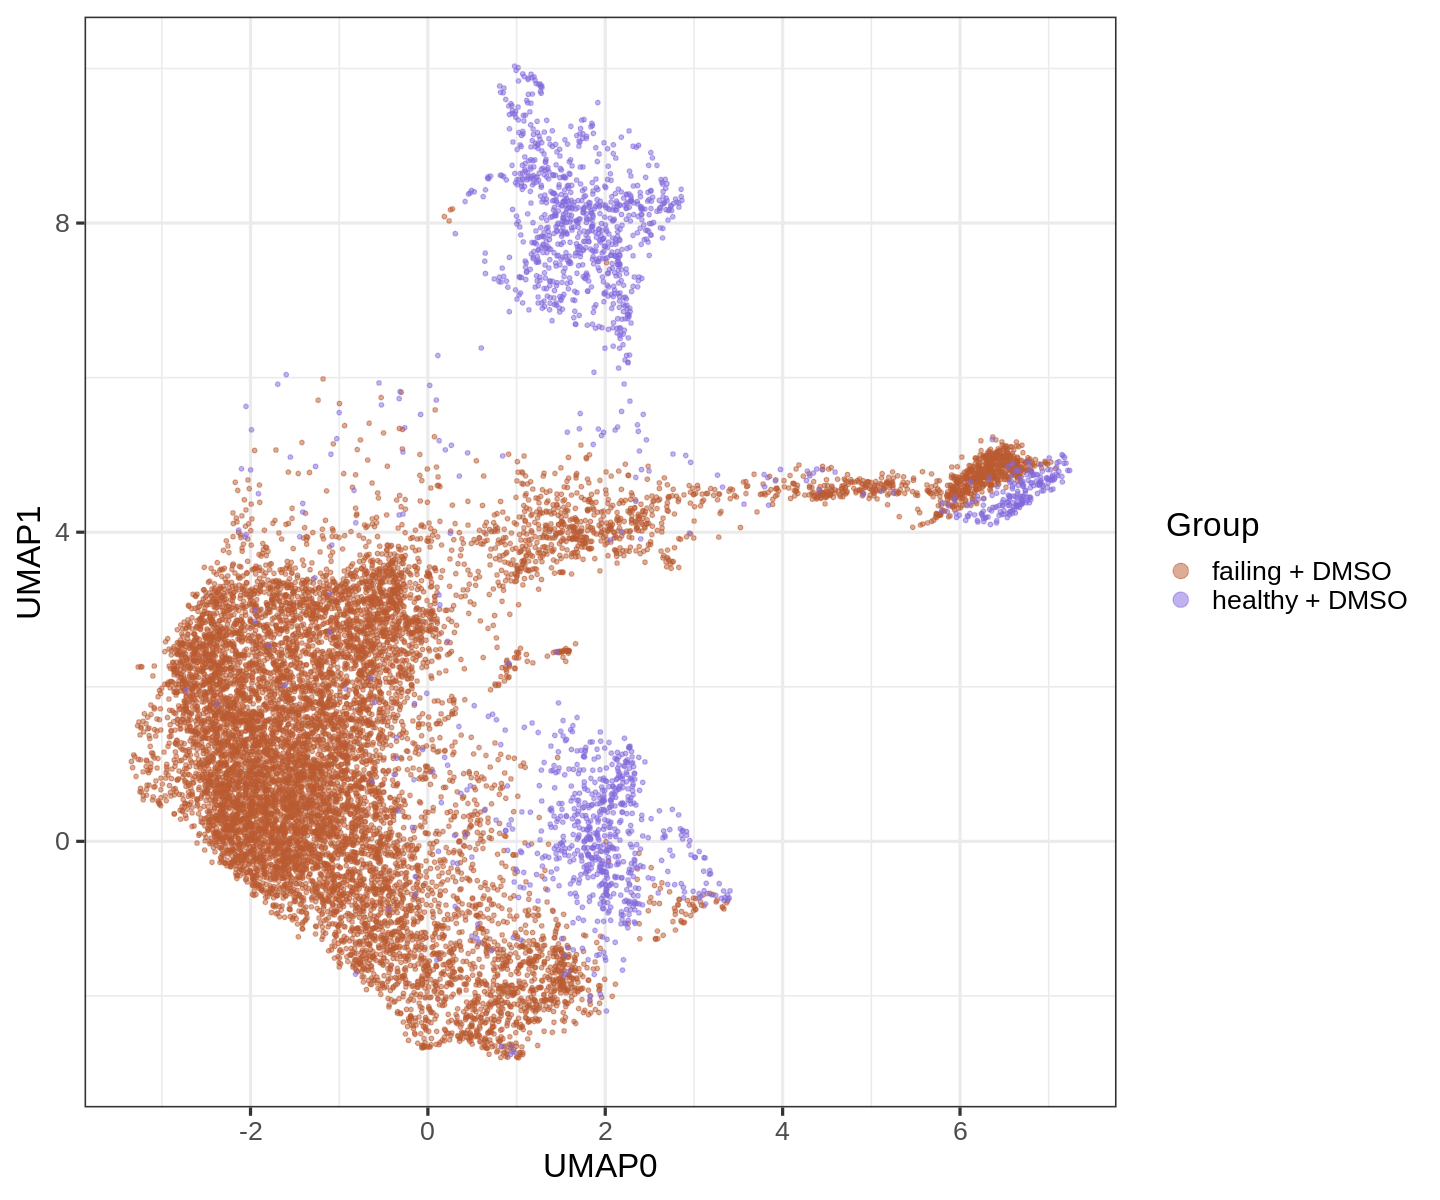

In [15]:
# output name 
output_file <- paste0(output_umap_file, "_treatment_F_H_dmso_cleaned_merged.png")

# Create a combined data frame with the "Group" column
combined_df <- rbind(
  dmso_failing_df %>% mutate(Group = "failing + DMSO"),
  dmso_healthy_df %>% mutate(Group = "healthy + DMSO")
)

merged_plot <- ggplot(combined_df, aes(x = UMAP0, y = UMAP1, color = Group)) +
  geom_point(size = 1.0, alpha = 0.5) +  # Adjust alpha value to make points more transparent
  theme_bw(base_size = 20) +  # Set the base font size to 20 (adjust as desired)
  scale_color_manual(
    name = "Group",
    values = c("failing + DMSO" = "#BA5A31", "healthy + DMSO" = "#8269dc")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1))

print(merged_plot)
ggsave(output_file, merged_plot, dpi = 500, height = 12, width = 12)


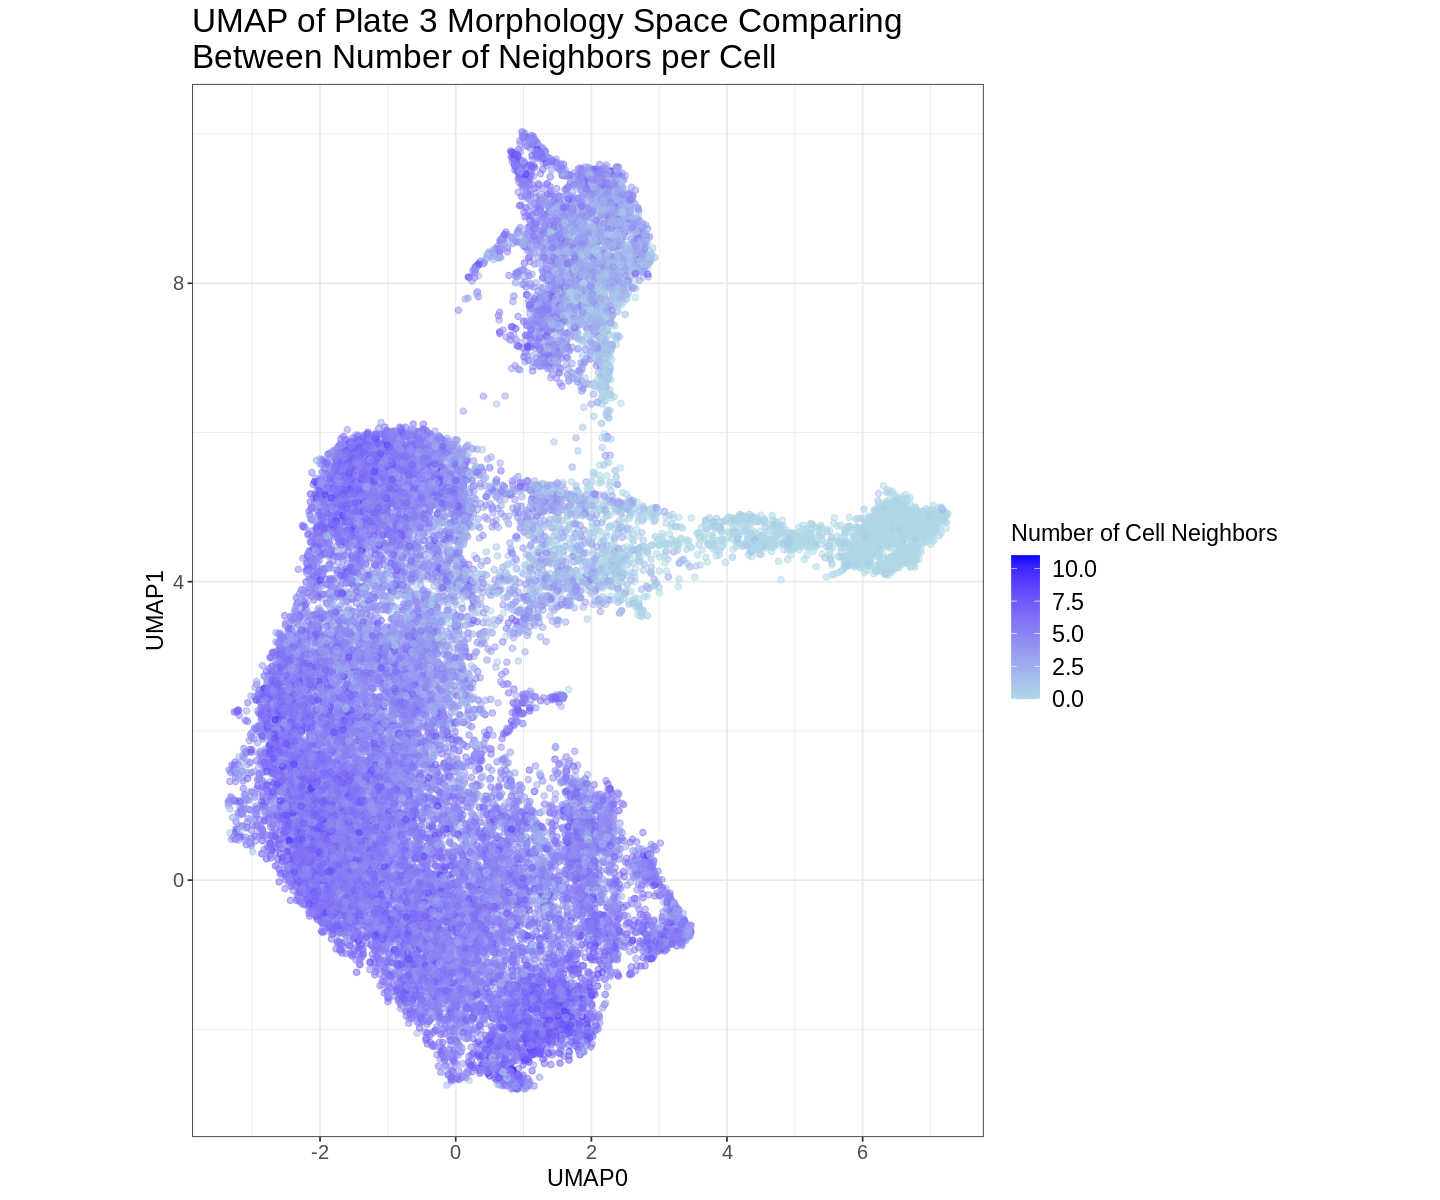

In [16]:
# Remove decimal from nuclei object number to avoid issues with merging
umap_cp_df <- umap_cp_df %>%
  mutate(Metadata_Nuclei_Number_Object_Number = gsub("\\.0", "", as.character(Metadata_Nuclei_Number_Object_Number)))

# Load in parquet file with nearest neighbors per single cell (not normalized)
neighbors_df <- arrow::read_parquet(
    "../../../3.process_cfret_features/data/single_cell_profiles/localhost230405150001_sc_annotated.parquet"
)

desired_columns <- c("Cells_Neighbors_NumberOfNeighbors_Adjacent", 
                     "Metadata_Well", 
                     "Metadata_Site", 
                     "Metadata_Nuclei_Number_Object_Number")

neighbors_df <- neighbors_df[, desired_columns]

neighbors_df <- neighbors_df %>%
  mutate(Metadata_Nuclei_Number_Object_Number = as.character(Metadata_Nuclei_Number_Object_Number))

# Assuming you want to merge based on the specified columns
merge_columns <- c("Metadata_Well", "Metadata_Site", "Metadata_Nuclei_Number_Object_Number")

# Merge number of neighbors based on cell to umap dataframe
merged_data <- merge(neighbors_df, umap_cp_df, by = merge_columns)

umap_cell_neighbors_figure <- 
  ggplot(merged_data, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Cells_Neighbors_NumberOfNeighbors_Adjacent), alpha = 0.5) +
  theme_bw() +
  scale_color_continuous(
    name = "Number of Cell Neighbors", 
    low = "light blue",
    high = "blue"
  ) +
  labs(title = "UMAP of Plate 3 Morphology Space Comparing\nBetween Number of Neighbors per Cell", x = "UMAP0", y = "UMAP1") +
  theme(
    # Increase title size
    plot.title = element_text(size = 20),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
  ) +
  coord_fixed(1.1)

# saving image
output_file <- file.path(paste0(output_umap_file, "_number_neighbors_cells.png"))
ggsave(output_file, umap_cell_neighbors_figure, dpi = 500, height = 10, width = 10)


print(umap_cell_neighbors_figure)


## Look at filtered plate 3 embeddings (only cells with 1 or less neighbors adjacent)

In [17]:
# Set directory and file structure
umap_dir <- file.path("results")
umap_file <- "UMAP_localhost230405150001_fs_filtered.tsv.gz"
umap_path <- file.path(umap_dir, umap_file)

# Load in the umap data
filtered_df <- readr::read_tsv(
    umap_path,
    col_types = readr::cols(
        .default = "c",
        "UMAP0" = "d",
        "UMAP1" = "d"
    )
)
cell_count_df <- filtered_df %>%
    dplyr::group_by(Metadata_Well) %>%
    dplyr::count() %>%
    dplyr::rename(Metadata_Cell_Count = n)

umap_filtered_df <- filtered_df %>%
    dplyr::left_join(cell_count_df, by = "Metadata_Well") %>%
    mutate_all(~ifelse(is.na(.), "None", .))

head(umap_filtered_df)


Metadata_WellRow Metadata_WellCol Metadata_heart_number Metadata_cell_type
1 B                2                9                     failing           
2 B                2                9                     failing           
3 B                2                9                     failing           
4 B                2                9                     failing           
5 B                2                9                     failing           
6 B                2                9                     failing           
  Metadata_heart_failure_type Metadata_treatment
1 rejected                    DMSO              
2 rejected                    DMSO              
3 rejected                    DMSO              
4 rejected                    DMSO              
5 rejected                    DMSO              
6 rejected                    DMSO              
  Metadata_Nuclei_Location_Center_X Metadata_Nuclei_Location_Center_Y
1 468.7905044510386                 375.8498516320475                
2 971.872386445566                  458.71449170872387               
3 537.7326155226559                 1001.0758187528039               
4 380.57686453576866                39.786402841197365               
5 545.0274261603375                 333.7489451476793                
6 185.37861811391224                385.44631185807657               
  Metadata_Cells_Location_Center_X Metadata_Cells_Location_Center_Y ⋯
1 442.36832611832614               370.497113997114                 ⋯
2 971.872386445566                 458.71449170872387               ⋯
3 537.423721340388                 1001.5141093474426               ⋯
4 342.9958071278826                72.29643605870021                ⋯
5 548.4341491841492                339.6136363636364                ⋯
6 190.78458431504544               383.67165937394816               ⋯
  Metadata_Well Metadata_Cells_Number_Object_Number
1 B02           12.0                               
2 B02           14.0                               
3 B02           32.0                               
4 B02           1.0                                
5 B02           4.0                                
6 B02           6.0                                
  Metadata_Cytoplasm_Parent_Cells Metadata_Cytoplasm_Parent_Nuclei
1 12.0                            16.0                            
2 14.0                            19.0                            
3 32.0                            43.0                            
4 1.0                             3.0                             
5 4.0                             8.0                             
6 6.0                             10.0                            
  Metadata_Nuclei_Number_Object_Number Metadata_Site
1 16.0                                 f00          
2 19.0                                 f00          
3 43.0                                 f01          
4 3.0                                  f02          
5 8.0                                  f02          
6 10.0                                 f02          
  Metadata_Neighbors_Adjacent UMAP0    UMAP1    Metadata_Cell_Count
1 0.0                         3.489574 9.354260 67                 
2 0.0                         9.235864 6.758095 67                 
3 0.0                         6.949471 7.977209 67                 
4 1.0                         2.529440 8.830969 67                 
5 0.0                         4.484315 8.294129 67                 
6 0.0                         2.353731 8.871962 67

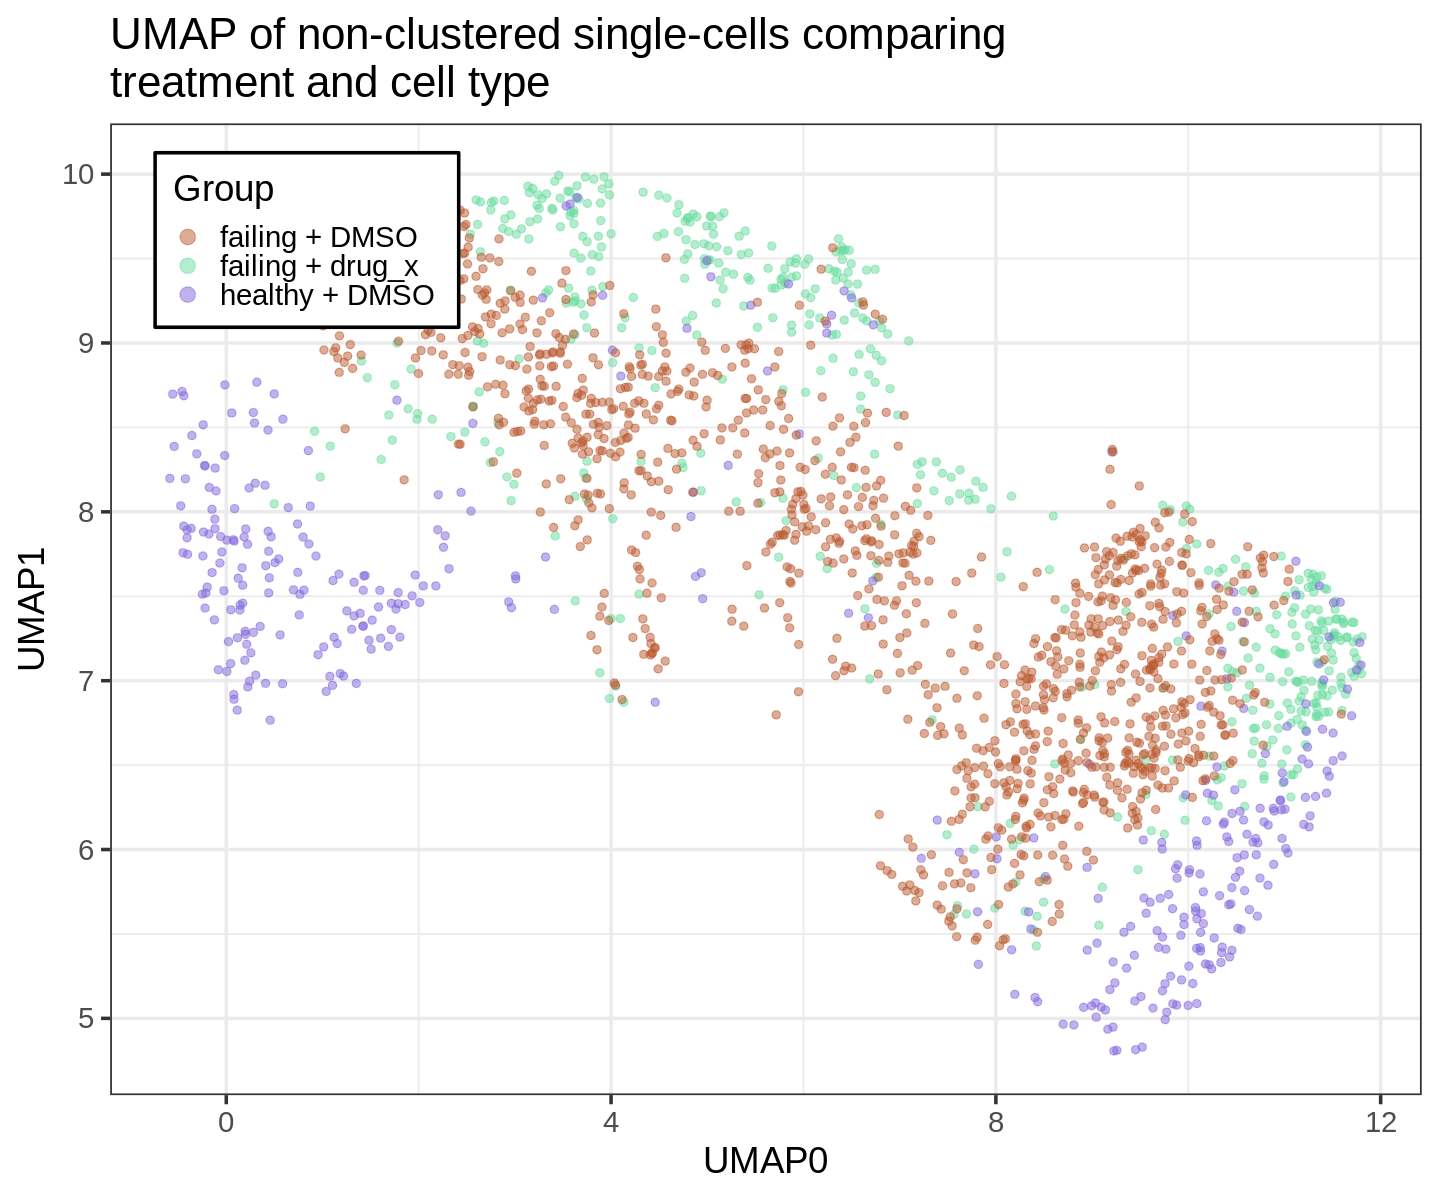

In [18]:
# Filter the data frames from the filtered data (only not clustered single cells)
filtered_failing_drug_x_df <- umap_filtered_df %>% filter(Metadata_cell_type == "failing" & Metadata_treatment == "drug_x")
filtered_failing_DMSO_df <- umap_filtered_df %>% filter(Metadata_cell_type == "failing" & Metadata_treatment == "DMSO")
filtered_healthy_DMSO_df <- umap_filtered_df %>% filter(Metadata_cell_type == "healthy" & Metadata_treatment == "DMSO")

# UMAP merged plots (from above)
output_file <- paste0(output_umap_file, "_filtered_failing_DMSO_and_DrugX_w_healhy_DMSO_Merged.png")

# Create a combined data frame with the "Group" column
filtered_combined_df <- rbind(
  filtered_failing_drug_x_df %>% mutate(Group = "failing + drug_x"),
  filtered_healthy_DMSO_df %>% mutate(Group = "healthy + DMSO"),
  filtered_failing_DMSO_df %>% mutate(Group = "failing + DMSO")
)

# Plot the combined data without facets
merged_filtered_plot <- ggplot(filtered_combined_df, aes(x = UMAP0, y = UMAP1, color = Group)) +
  geom_point(size = 2.0 , alpha = 0.5) +  # Adjust alpha value to make points more transparent
  labs(title = "UMAP of non-clustered single-cells comparing\ntreatment and cell type ") + 
  theme_bw(base_size = 22) +  # Set the base font size to 12
  scale_color_manual(
    name = "Group",
    values = c("failing + drug_x" = "#69DC9E", "failing + DMSO" = "#BA5A31", "healthy + DMSO" = "#8269dc")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  ylim(min(filtered_combined_df$UMAP1), max(filtered_combined_df$UMAP1)) +  # Set the same y-axis limits as umap_cp_df
  theme(
    legend.position = c(0.15, 0.88),  # Adjust the legend position (x, y)
    legend.background = element_rect(fill = "white", color = "black"),  # Add a white background to the legend
    legend.key = element_rect(color = "white"),  # Make legend key (color boxes) white

  )
# print and save plot
print(merged_filtered_plot)
ggsave(output_file, merged_filtered_plot, dpi = 500, height = 12, width = 12)


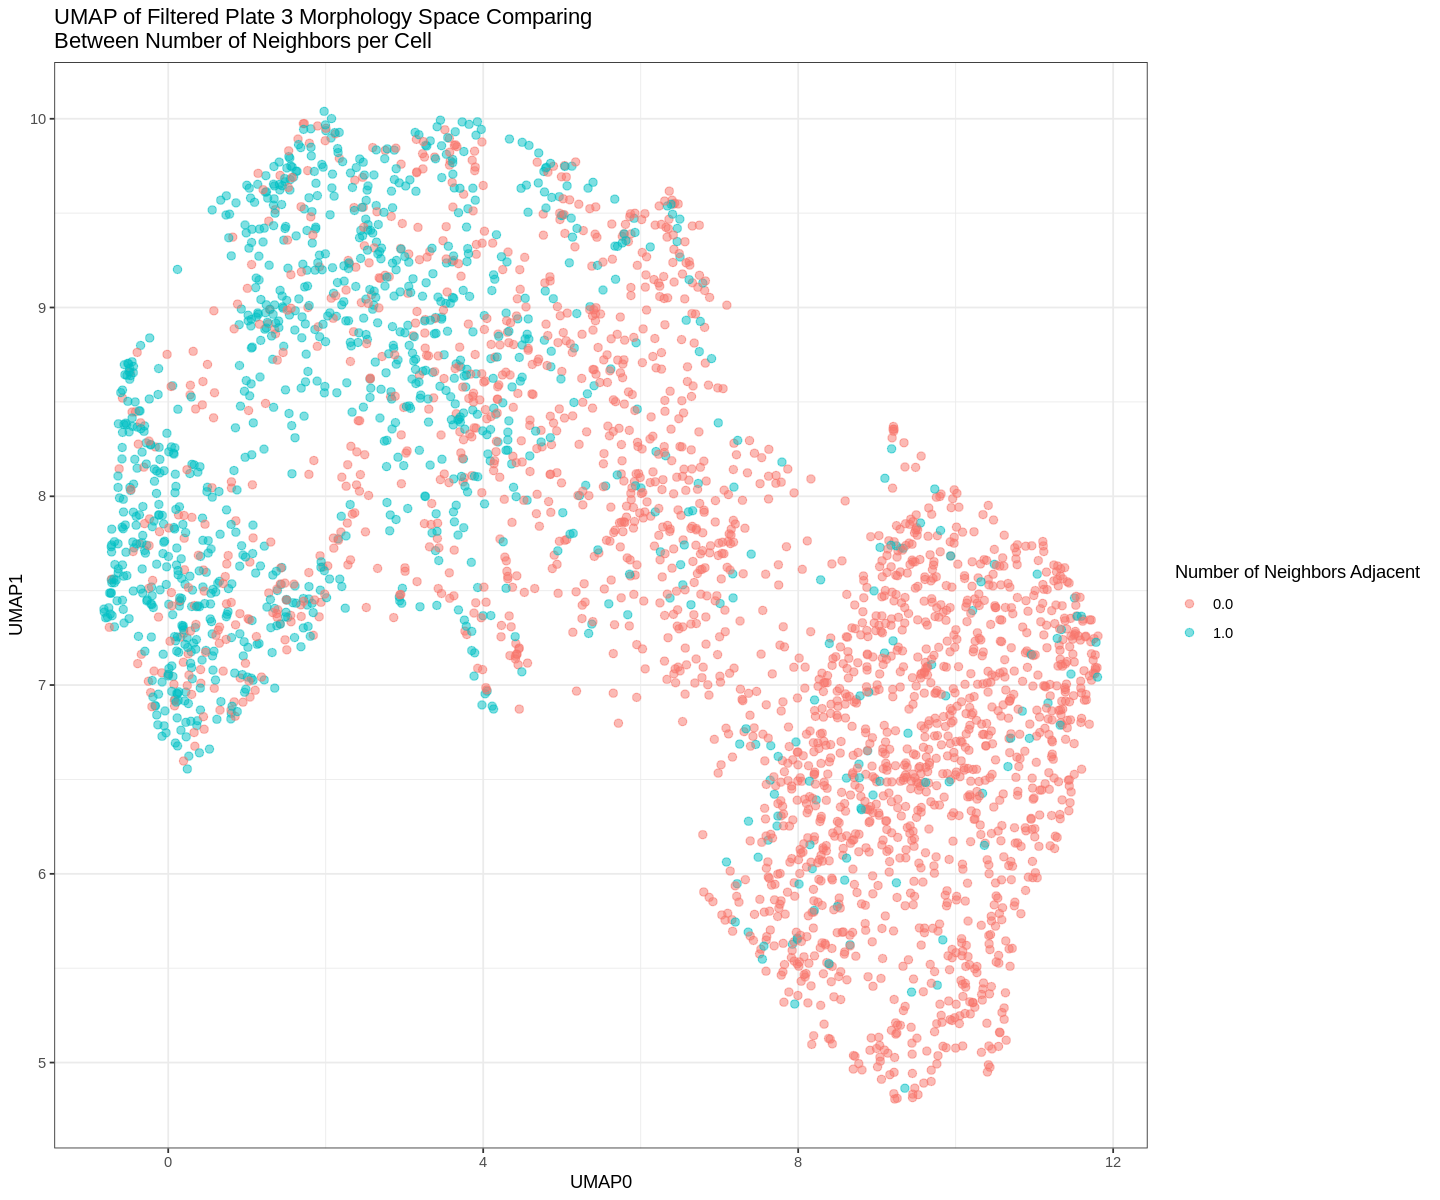

In [19]:
umap_filtered_cell_neighbors_figure <- 
  ggplot(umap_filtered_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_Neighbors_Adjacent), alpha = 0.5, size = 2) +
  theme_bw() +
  labs(title = "UMAP of Filtered Plate 3 Morphology Space Comparing\nBetween Number of Neighbors per Cell", x = "UMAP0", y = "UMAP1") +
  scale_color_discrete(name = "Number of Neighbors Adjacent")

# saving image
output_file <- file.path(paste0(output_umap_file, "_filtered_number_neighbors_cells.png"))
ggsave(output_file, umap_filtered_cell_neighbors_figure, dpi = 500, height = 8, width = 8)


print(umap_filtered_cell_neighbors_figure)